In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, PReLU
from keras_tuner.tuners import RandomSearch

from sklearn.metrics import mean_absolute_percentage_error

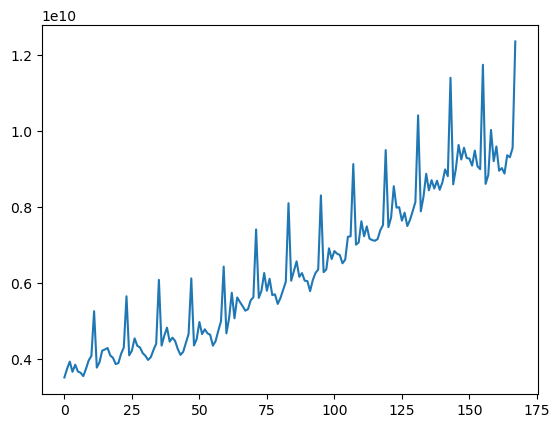

In [2]:
# numpyを使う
# ここでは元系列のまま分析を行う
series = np.loadtxt("../public/full_monthly_sales_without_header.csv")
plt.plot(series)
plt.show()

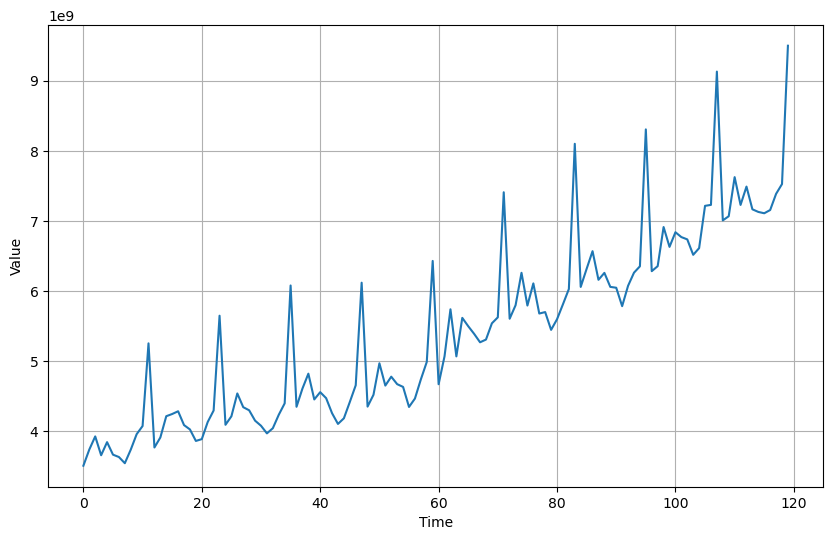

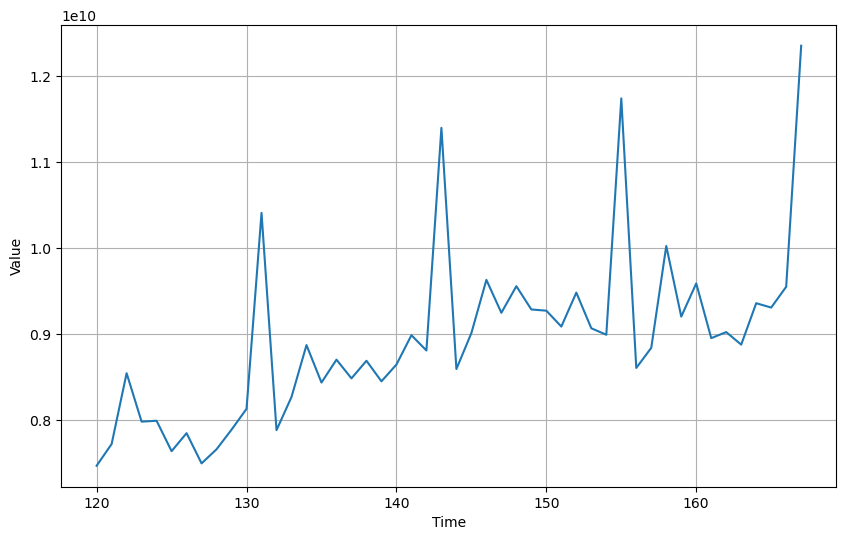

In [3]:
# 前半120時点を学習データ、以降を48時点を検証データとして分割

split_time = 120
time = np.arange(168, dtype="float32")

time_train = time[:split_time]
x_train = series[:split_time]
time_train_pred = time[20:split_time]
time_valid = time[split_time:168]
x_valid = series[split_time:168]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

plt.figure(figsize=(10, 6))
plot_series(time_train, x_train) # 学習セット
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid) # 検証セット
plt.show()

In [4]:
# 畳み込みのコード化

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [6]:
# filters・・・学習させたいフィルタの数。この数のフィルタを生成し、データに会うように時間をかけて学習する。
# kernel_size・・・フィルタの大きさ。
# strides・・・フィルタがリストをスキャンする際のステップの大きさ。通常は1。
# padding・・・リストのどちらの端からデータをドロップするかを決定する。
# activatoin・・・活性化関数。reluは層から出てくる負の値を効果的に排除することを意味する。
# input_shape・・・ネットワークに渡す入力データの形状。ここでは最初の層のため指定する必要がある。

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
    tf.keras.layers.Dense(28, activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1),
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5)
model.compile(loss="mape", optimizer=optimizer)
history = model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 8ms/step - loss: 94.9995
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 94.3407
Epoch 3/500
4/4 [==============================] - 0s 6ms/step - loss: 93.6117
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 92.8703
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 92.1258
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 91.4047
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 90.6827
Epoch 8/500
4/4 [==============================] - 0s 8ms/step - loss: 89.9706
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 89.2775
Epoch 10/500
4/4 [==============================] - 0s 9ms/step - loss: 88.6216
Epoch 11/500
4/4 [==============================] - 0s 4ms/step - loss: 88.0236
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 87.4784
Epoch 13/500
4/4 [==============================]

4/4 [==============================] - 0s 3ms/step - loss: 12.6690
Epoch 104/500
4/4 [==============================] - 0s 4ms/step - loss: 12.6712
Epoch 105/500
4/4 [==============================] - 0s 5ms/step - loss: 12.6603
Epoch 106/500
4/4 [==============================] - 0s 3ms/step - loss: 12.6556
Epoch 107/500
4/4 [==============================] - 0s 3ms/step - loss: 12.6516
Epoch 108/500
4/4 [==============================] - 0s 3ms/step - loss: 12.6422
Epoch 109/500
4/4 [==============================] - 0s 4ms/step - loss: 12.6367
Epoch 110/500
4/4 [==============================] - 0s 4ms/step - loss: 12.6303
Epoch 111/500
4/4 [==============================] - 0s 3ms/step - loss: 12.6331
Epoch 112/500
4/4 [==============================] - 0s 4ms/step - loss: 12.6242
Epoch 113/500
4/4 [==============================] - 0s 3ms/step - loss: 12.6151
Epoch 114/500
4/4 [==============================] - 0s 3ms/step - loss: 12.6103
Epoch 115/500
4/4 [=======================

4/4 [==============================] - 0s 5ms/step - loss: 12.1884
Epoch 205/500
4/4 [==============================] - 0s 5ms/step - loss: 12.1810
Epoch 206/500
4/4 [==============================] - 0s 3ms/step - loss: 12.1806
Epoch 207/500
4/4 [==============================] - 0s 3ms/step - loss: 12.1774
Epoch 208/500
4/4 [==============================] - 0s 3ms/step - loss: 12.1707
Epoch 209/500
4/4 [==============================] - 0s 2ms/step - loss: 12.1690
Epoch 210/500
4/4 [==============================] - 0s 2ms/step - loss: 12.1682
Epoch 211/500
4/4 [==============================] - 0s 3ms/step - loss: 12.1616
Epoch 212/500
4/4 [==============================] - 0s 4ms/step - loss: 12.1556
Epoch 213/500
4/4 [==============================] - 0s 3ms/step - loss: 12.1496
Epoch 214/500
4/4 [==============================] - 0s 3ms/step - loss: 12.1527
Epoch 215/500
4/4 [==============================] - 0s 3ms/step - loss: 12.1461
Epoch 216/500
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 11.7359
Epoch 306/500
4/4 [==============================] - 0s 4ms/step - loss: 11.7349
Epoch 307/500
4/4 [==============================] - 0s 3ms/step - loss: 11.7292
Epoch 308/500
4/4 [==============================] - 0s 4ms/step - loss: 11.7239
Epoch 309/500
4/4 [==============================] - 0s 3ms/step - loss: 11.7203
Epoch 310/500
4/4 [==============================] - 0s 7ms/step - loss: 11.7348
Epoch 311/500
4/4 [==============================] - 0s 7ms/step - loss: 11.7150
Epoch 312/500
4/4 [==============================] - 0s 7ms/step - loss: 11.7066
Epoch 313/500
4/4 [==============================] - 0s 5ms/step - loss: 11.7007
Epoch 314/500
4/4 [==============================] - 0s 4ms/step - loss: 11.6961
Epoch 315/500
4/4 [==============================] - 0s 4ms/step - loss: 11.6962
Epoch 316/500
4/4 [==============================] - 0s 4ms/step - loss: 11.6883
Epoch 317/500
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 11.2851
Epoch 407/500
4/4 [==============================] - 0s 3ms/step - loss: 11.2877
Epoch 408/500
4/4 [==============================] - 0s 2ms/step - loss: 11.2789
Epoch 409/500
4/4 [==============================] - 0s 3ms/step - loss: 11.2785
Epoch 410/500
4/4 [==============================] - 0s 3ms/step - loss: 11.2676
Epoch 411/500
4/4 [==============================] - 0s 3ms/step - loss: 11.2715
Epoch 412/500
4/4 [==============================] - 0s 3ms/step - loss: 11.2752
Epoch 413/500
4/4 [==============================] - 0s 3ms/step - loss: 11.2693
Epoch 414/500
4/4 [==============================] - 0s 3ms/step - loss: 11.2800
Epoch 415/500
4/4 [==============================] - 0s 3ms/step - loss: 11.2775
Epoch 416/500
4/4 [==============================] - 0s 2ms/step - loss: 11.2526
Epoch 417/500
4/4 [==============================] - 0s 3ms/step - loss: 11.2459
Epoch 418/500
4/4 [=======================

5/5 [==============================] - 0s 14ms/step


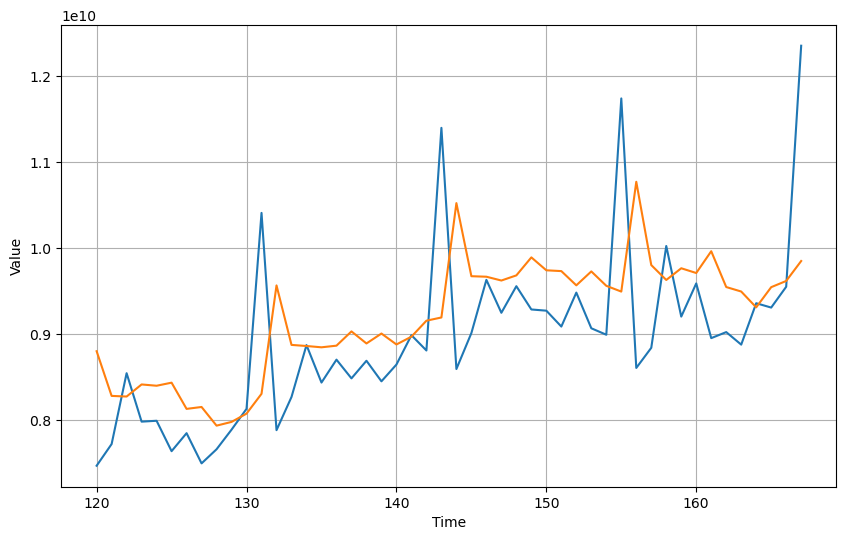

In [8]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

forecast = model_forecast(model, series[..., np.newaxis], window_size)
results = forecast[split_time - window_size:-1, -1, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [9]:
%%time
# 学習率の大まかなエリアを絞り込む
# ReLU・エポック数500

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1),
])


lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss="mape", optimizer=optimizer)
history = model.fit(dataset, epochs=500, callbacks=[lr_schedule], verbose=0)

CPU times: user 17.1 s, sys: 2.45 s, total: 19.6 s
Wall time: 14.8 s


(1e-08, 0.001, 0.0, 300.0)

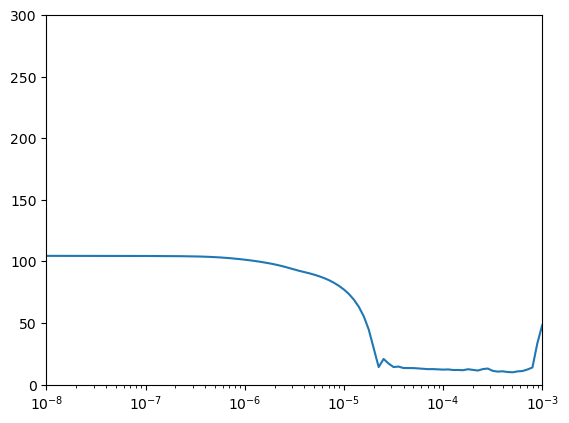

In [10]:
lrs = 1e-8 * (10 ** (np.arange(500) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [11]:
%%time
# ReLU・エポック数500
# my_dir/CNN_3

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

def build_model(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv1D(filters=hp.Int('units',min_value=128, max_value=256, step=64), 
                                   kernel_size=hp.Int('kernels', min_value=3, max_value=9, step=3),
                                   strides=hp.Int('strides', min_value=1, max_value=3, step=1),
                                   padding='causal', activation='relu', input_shape=[None, 1]))

  model.add(Dense(units=hp.Int('units1', min_value=2, max_value=30, step=4), input_shape=[window_size], activation='relu'))
  model.add(Dense(units=hp.Int('units2', min_value=2, max_value=30, step=4), activation='relu'))
  model.add(Dense(1))

  model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(hp.Choice('momentum', values=[0.5, 0.7, 0.9]), lr=1e-4))
  return model

tuner = RandomSearch(build_model, objective='loss', max_trials=60, executions_per_trial=3, directory='my_dir', project_name='CNN_3')

tuner.search_space_summary()

tuner.search(dataset, epochs=500, verbose=2)

Trial 60 Complete [00h 00m 42s]
loss: 8.73609479268392

Best loss So Far: 7.730406443277995
Total elapsed time: 00h 56m 50s
INFO:tensorflow:Oracle triggered exit
CPU times: user 1h 52s, sys: 8min 43s, total: 1h 9min 36s
Wall time: 56min 49s


In [12]:
tuner.results_summary()

Results summary
Results in my_dir/CNN_3
Showing 10 best trials
Trial summary
Hyperparameters:
units: 256
kernels: 9
strides: 1
units1: 26
units2: 6
momentum: 0.5
Score: 7.730406443277995
Trial summary
Hyperparameters:
units: 256
kernels: 9
strides: 3
units1: 6
units2: 10
momentum: 0.7
Score: 7.835908095041911
Trial summary
Hyperparameters:
units: 256
kernels: 9
strides: 3
units1: 14
units2: 26
momentum: 0.7
Score: 7.847173531850179
Trial summary
Hyperparameters:
units: 192
kernels: 6
strides: 3
units1: 14
units2: 6
momentum: 0.7
Score: 7.871429920196533
Trial summary
Hyperparameters:
units: 128
kernels: 9
strides: 2
units1: 18
units2: 6
momentum: 0.9
Score: 7.872888882954915
Trial summary
Hyperparameters:
units: 192
kernels: 9
strides: 2
units1: 30
units2: 18
momentum: 0.9
Score: 7.919757684071858
Trial summary
Hyperparameters:
units: 192
kernels: 6
strides: 3
units1: 10
units2: 26
momentum: 0.5
Score: 7.964134216308594
Trial summary
Hyperparameters:
units: 192
kernels: 9
strides: 1
un

In [55]:
from tensorflow.keras.layers import Conv1D

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Conv1D(filters=256, kernel_size=9, strides=1, padding='causal', activation='relu', input_shape=[None, 1]))
model.add(Dense(26, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=2)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 - 1s - loss: 103.1577 - 640ms/epoch - 160ms/step
Epoch 2/500
4/4 - 0s - loss: 99.9306 - 48ms/epoch - 12ms/step
Epoch 3/500
4/4 - 0s - loss: 99.8881 - 26ms/epoch - 6ms/step
Epoch 4/500
4/4 - 0s - loss: 99.8497 - 33ms/epoch - 8ms/step
Epoch 5/500
4/4 - 0s - loss: 99.7832 - 33ms/epoch - 8ms/step
Epoch 6/500
4/4 - 0s - loss: 99.5911 - 31ms/epoch - 8ms/step
Epoch 7/500
4/4 - 0s - loss: 99.2092 - 54ms/epoch - 13ms/step
Epoch 8/500
4/4 - 0s - loss: 95.9623 - 47ms/epoch - 12ms/step
Epoch 9/500
4/4 - 0s - loss: 88.3971 - 37ms/epoch - 9ms/step
Epoch 10/500
4/4 - 0s - loss: 78.8225 - 46ms/epoch - 11ms/step
Epoch 11/500
4/4 - 0s - loss: 65.0623 - 35ms/epoch - 9ms/step
Epoch 12/500
4/4 - 0s - loss: 41.5598 - 26ms/epoch - 6ms/step
Epoch 13/500
4/4 - 0s - loss: 23.5783 - 28ms/epoch - 7ms/step
Epoch 14/500
4/4 - 0s - loss: 21.9636 - 33ms/epoch - 8ms/step
Epoch 15/500
4/4 - 0s - loss: 21.1729 - 26ms/epoch - 6ms/step
Epoch 16/500
4/4 - 0s - loss: 20.5636 - 36ms/epoch - 9ms/step
Epoch 17/500
4/4 - 0s

Epoch 133/500
4/4 - 0s - loss: 9.2113 - 35ms/epoch - 9ms/step
Epoch 134/500
4/4 - 0s - loss: 11.6877 - 29ms/epoch - 7ms/step
Epoch 135/500
4/4 - 0s - loss: 9.5166 - 28ms/epoch - 7ms/step
Epoch 136/500
4/4 - 0s - loss: 9.3304 - 27ms/epoch - 7ms/step
Epoch 137/500
4/4 - 0s - loss: 9.6113 - 30ms/epoch - 8ms/step
Epoch 138/500
4/4 - 0s - loss: 9.2717 - 35ms/epoch - 9ms/step
Epoch 139/500
4/4 - 0s - loss: 10.3926 - 30ms/epoch - 8ms/step
Epoch 140/500
4/4 - 0s - loss: 9.7846 - 35ms/epoch - 9ms/step
Epoch 141/500
4/4 - 0s - loss: 9.1659 - 35ms/epoch - 9ms/step
Epoch 142/500
4/4 - 0s - loss: 10.4280 - 32ms/epoch - 8ms/step
Epoch 143/500
4/4 - 0s - loss: 9.3141 - 28ms/epoch - 7ms/step
Epoch 144/500
4/4 - 0s - loss: 9.4051 - 34ms/epoch - 8ms/step
Epoch 145/500
4/4 - 0s - loss: 9.9087 - 33ms/epoch - 8ms/step
Epoch 146/500
4/4 - 0s - loss: 10.0111 - 30ms/epoch - 7ms/step
Epoch 147/500
4/4 - 0s - loss: 9.6193 - 31ms/epoch - 8ms/step
Epoch 148/500
4/4 - 0s - loss: 9.2862 - 33ms/epoch - 8ms/step
Epoc

Epoch 265/500
4/4 - 0s - loss: 8.5710 - 27ms/epoch - 7ms/step
Epoch 266/500
4/4 - 0s - loss: 8.3531 - 39ms/epoch - 10ms/step
Epoch 267/500
4/4 - 0s - loss: 9.5011 - 36ms/epoch - 9ms/step
Epoch 268/500
4/4 - 0s - loss: 9.4722 - 31ms/epoch - 8ms/step
Epoch 269/500
4/4 - 0s - loss: 9.3122 - 26ms/epoch - 7ms/step
Epoch 270/500
4/4 - 0s - loss: 9.3083 - 37ms/epoch - 9ms/step
Epoch 271/500
4/4 - 0s - loss: 8.5411 - 30ms/epoch - 8ms/step
Epoch 272/500
4/4 - 0s - loss: 8.4966 - 34ms/epoch - 8ms/step
Epoch 273/500
4/4 - 0s - loss: 8.4437 - 31ms/epoch - 8ms/step
Epoch 274/500
4/4 - 0s - loss: 9.4028 - 29ms/epoch - 7ms/step
Epoch 275/500
4/4 - 0s - loss: 8.9262 - 30ms/epoch - 7ms/step
Epoch 276/500
4/4 - 0s - loss: 8.7767 - 33ms/epoch - 8ms/step
Epoch 277/500
4/4 - 0s - loss: 10.7297 - 36ms/epoch - 9ms/step
Epoch 278/500
4/4 - 0s - loss: 8.4674 - 37ms/epoch - 9ms/step
Epoch 279/500
4/4 - 0s - loss: 8.4367 - 30ms/epoch - 7ms/step
Epoch 280/500
4/4 - 0s - loss: 9.0863 - 37ms/epoch - 9ms/step
Epoch 

Epoch 397/500
4/4 - 0s - loss: 8.7159 - 30ms/epoch - 8ms/step
Epoch 398/500
4/4 - 0s - loss: 7.9200 - 27ms/epoch - 7ms/step
Epoch 399/500
4/4 - 0s - loss: 8.1399 - 27ms/epoch - 7ms/step
Epoch 400/500
4/4 - 0s - loss: 8.6910 - 26ms/epoch - 7ms/step
Epoch 401/500
4/4 - 0s - loss: 8.8994 - 29ms/epoch - 7ms/step
Epoch 402/500
4/4 - 0s - loss: 8.7474 - 32ms/epoch - 8ms/step
Epoch 403/500
4/4 - 0s - loss: 8.6126 - 26ms/epoch - 7ms/step
Epoch 404/500
4/4 - 0s - loss: 8.0549 - 26ms/epoch - 7ms/step
Epoch 405/500
4/4 - 0s - loss: 7.9460 - 31ms/epoch - 8ms/step
Epoch 406/500
4/4 - 0s - loss: 7.9706 - 30ms/epoch - 8ms/step
Epoch 407/500
4/4 - 0s - loss: 7.9282 - 26ms/epoch - 7ms/step
Epoch 408/500
4/4 - 0s - loss: 8.4417 - 28ms/epoch - 7ms/step
Epoch 409/500
4/4 - 0s - loss: 9.6462 - 28ms/epoch - 7ms/step
Epoch 410/500
4/4 - 0s - loss: 7.9185 - 26ms/epoch - 7ms/step
Epoch 411/500
4/4 - 0s - loss: 8.2845 - 28ms/epoch - 7ms/step
Epoch 412/500
4/4 - 0s - loss: 8.0120 - 33ms/epoch - 8ms/step
Epoch 41

5/5 [==============================] - 0s 41ms/step


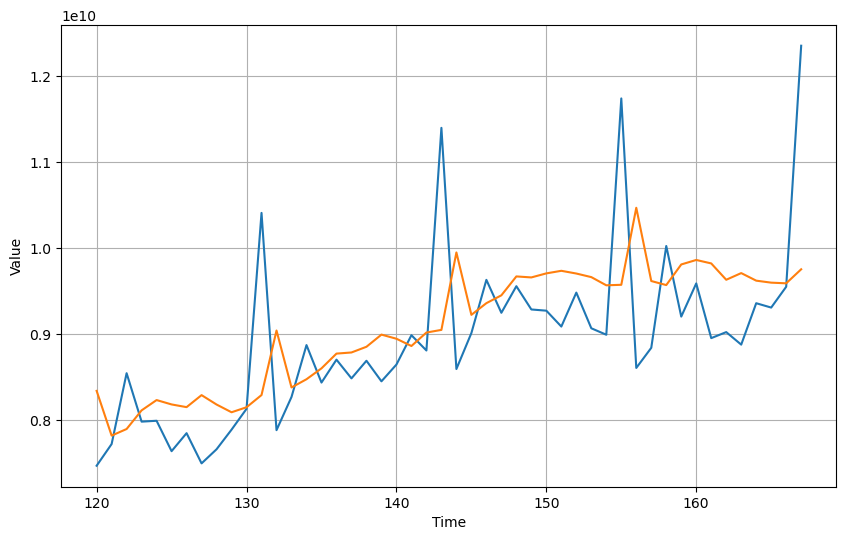

In [56]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

forecast = model_forecast(model, series[..., np.newaxis], window_size)
results = forecast[split_time - window_size:-1, -1, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [57]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.09526430721249646


In [58]:
from tensorflow.keras.layers import Conv1D

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Conv1D(filters=256, kernel_size=9, strides=1, padding='valid', activation='relu', input_shape=[None, 1]))
model.add(Dense(26, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=2)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 - 1s - loss: 98.1535 - 661ms/epoch - 165ms/step
Epoch 2/500
4/4 - 0s - loss: 75.9123 - 37ms/epoch - 9ms/step
Epoch 3/500
4/4 - 0s - loss: 48.3226 - 35ms/epoch - 9ms/step
Epoch 4/500
4/4 - 0s - loss: 12.1306 - 33ms/epoch - 8ms/step
Epoch 5/500
4/4 - 0s - loss: 6.9546 - 36ms/epoch - 9ms/step
Epoch 6/500
4/4 - 0s - loss: 6.5215 - 32ms/epoch - 8ms/step
Epoch 7/500
4/4 - 0s - loss: 6.6387 - 40ms/epoch - 10ms/step
Epoch 8/500
4/4 - 0s - loss: 6.5809 - 33ms/epoch - 8ms/step
Epoch 9/500
4/4 - 0s - loss: 8.5247 - 29ms/epoch - 7ms/step
Epoch 10/500
4/4 - 0s - loss: 7.1309 - 29ms/epoch - 7ms/step
Epoch 11/500
4/4 - 0s - loss: 6.6561 - 35ms/epoch - 9ms/step
Epoch 12/500
4/4 - 0s - loss: 6.8265 - 33ms/epoch - 8ms/step
Epoch 13/500
4/4 - 0s - loss: 6.5047 - 28ms/epoch - 7ms/step
Epoch 14/500
4/4 - 0s - loss: 6.7248 - 31ms/epoch - 8ms/step
Epoch 15/500
4/4 - 0s - loss: 6.5954 - 26ms/epoch - 7ms/step
Epoch 16/500
4/4 - 0s - loss: 6.7309 - 33ms/epoch - 8ms/step
Epoch 17/500
4/4 - 0s - loss: 6.5081 

Epoch 135/500
4/4 - 0s - loss: 6.4257 - 34ms/epoch - 8ms/step
Epoch 136/500
4/4 - 0s - loss: 6.8693 - 31ms/epoch - 8ms/step
Epoch 137/500
4/4 - 0s - loss: 6.4621 - 35ms/epoch - 9ms/step
Epoch 138/500
4/4 - 0s - loss: 6.9187 - 28ms/epoch - 7ms/step
Epoch 139/500
4/4 - 0s - loss: 6.9425 - 38ms/epoch - 9ms/step
Epoch 140/500
4/4 - 0s - loss: 6.8019 - 31ms/epoch - 8ms/step
Epoch 141/500
4/4 - 0s - loss: 7.0401 - 31ms/epoch - 8ms/step
Epoch 142/500
4/4 - 0s - loss: 7.1823 - 27ms/epoch - 7ms/step
Epoch 143/500
4/4 - 0s - loss: 6.7120 - 25ms/epoch - 6ms/step
Epoch 144/500
4/4 - 0s - loss: 7.3562 - 25ms/epoch - 6ms/step
Epoch 145/500
4/4 - 0s - loss: 6.6031 - 28ms/epoch - 7ms/step
Epoch 146/500
4/4 - 0s - loss: 6.6282 - 30ms/epoch - 8ms/step
Epoch 147/500
4/4 - 0s - loss: 8.1488 - 27ms/epoch - 7ms/step
Epoch 148/500
4/4 - 0s - loss: 6.6096 - 25ms/epoch - 6ms/step
Epoch 149/500
4/4 - 0s - loss: 6.7471 - 23ms/epoch - 6ms/step
Epoch 150/500
4/4 - 0s - loss: 7.7282 - 23ms/epoch - 6ms/step
Epoch 15

4/4 - 0s - loss: 6.8853 - 28ms/epoch - 7ms/step
Epoch 268/500
4/4 - 0s - loss: 6.6576 - 24ms/epoch - 6ms/step
Epoch 269/500
4/4 - 0s - loss: 6.8713 - 25ms/epoch - 6ms/step
Epoch 270/500
4/4 - 0s - loss: 7.3134 - 26ms/epoch - 6ms/step
Epoch 271/500
4/4 - 0s - loss: 6.5712 - 26ms/epoch - 7ms/step
Epoch 272/500
4/4 - 0s - loss: 6.6279 - 29ms/epoch - 7ms/step
Epoch 273/500
4/4 - 0s - loss: 7.2013 - 30ms/epoch - 7ms/step
Epoch 274/500
4/4 - 0s - loss: 6.8956 - 29ms/epoch - 7ms/step
Epoch 275/500
4/4 - 0s - loss: 6.6403 - 29ms/epoch - 7ms/step
Epoch 276/500
4/4 - 0s - loss: 7.1007 - 24ms/epoch - 6ms/step
Epoch 277/500
4/4 - 0s - loss: 6.6273 - 24ms/epoch - 6ms/step
Epoch 278/500
4/4 - 0s - loss: 6.5981 - 25ms/epoch - 6ms/step
Epoch 279/500
4/4 - 0s - loss: 6.5154 - 25ms/epoch - 6ms/step
Epoch 280/500
4/4 - 0s - loss: 6.4827 - 28ms/epoch - 7ms/step
Epoch 281/500
4/4 - 0s - loss: 6.4555 - 23ms/epoch - 6ms/step
Epoch 282/500
4/4 - 0s - loss: 6.5960 - 29ms/epoch - 7ms/step
Epoch 283/500
4/4 - 0s

Epoch 400/500
4/4 - 0s - loss: 6.7067 - 34ms/epoch - 8ms/step
Epoch 401/500
4/4 - 0s - loss: 6.6169 - 33ms/epoch - 8ms/step
Epoch 402/500
4/4 - 0s - loss: 6.4748 - 29ms/epoch - 7ms/step
Epoch 403/500
4/4 - 0s - loss: 6.4723 - 29ms/epoch - 7ms/step
Epoch 404/500
4/4 - 0s - loss: 6.7514 - 37ms/epoch - 9ms/step
Epoch 405/500
4/4 - 0s - loss: 6.7526 - 32ms/epoch - 8ms/step
Epoch 406/500
4/4 - 0s - loss: 6.5108 - 34ms/epoch - 9ms/step
Epoch 407/500
4/4 - 0s - loss: 6.5641 - 47ms/epoch - 12ms/step
Epoch 408/500
4/4 - 0s - loss: 7.3352 - 38ms/epoch - 10ms/step
Epoch 409/500
4/4 - 0s - loss: 6.9138 - 38ms/epoch - 10ms/step
Epoch 410/500
4/4 - 0s - loss: 6.5414 - 34ms/epoch - 8ms/step
Epoch 411/500
4/4 - 0s - loss: 6.7499 - 43ms/epoch - 11ms/step
Epoch 412/500
4/4 - 0s - loss: 6.5046 - 38ms/epoch - 9ms/step
Epoch 413/500
4/4 - 0s - loss: 6.4627 - 43ms/epoch - 11ms/step
Epoch 414/500
4/4 - 0s - loss: 7.3396 - 31ms/epoch - 8ms/step
Epoch 415/500
4/4 - 0s - loss: 6.7118 - 36ms/epoch - 9ms/step
Epo

5/5 [==============================] - 0s 27ms/step


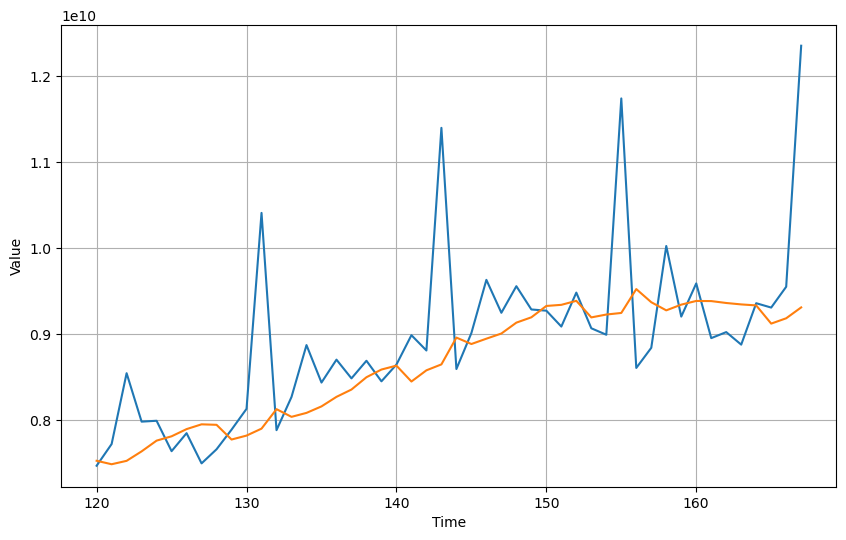

In [59]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

forecast = model_forecast(model, series[..., np.newaxis], window_size)
results = forecast[split_time - window_size:-1, -1, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [60]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.09526430721249646


In [61]:
from tensorflow.keras.layers import Conv1D

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Conv1D(filters=256, kernel_size=9, strides=1, padding='same', activation='relu', input_shape=[None, 1]))
model.add(Dense(26, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=2)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 - 1s - loss: 102.4240 - 568ms/epoch - 142ms/step
Epoch 2/500
4/4 - 0s - loss: 100.0418 - 37ms/epoch - 9ms/step
Epoch 3/500
4/4 - 0s - loss: 99.9697 - 36ms/epoch - 9ms/step
Epoch 4/500
4/4 - 0s - loss: 99.9349 - 35ms/epoch - 9ms/step
Epoch 5/500
4/4 - 0s - loss: 99.8659 - 33ms/epoch - 8ms/step
Epoch 6/500
4/4 - 0s - loss: 99.4512 - 25ms/epoch - 6ms/step
Epoch 7/500
4/4 - 0s - loss: 98.5866 - 32ms/epoch - 8ms/step
Epoch 8/500
4/4 - 0s - loss: 97.6730 - 30ms/epoch - 7ms/step
Epoch 9/500
4/4 - 0s - loss: 96.7383 - 45ms/epoch - 11ms/step
Epoch 10/500
4/4 - 0s - loss: 95.6950 - 47ms/epoch - 12ms/step
Epoch 11/500
4/4 - 0s - loss: 94.4941 - 72ms/epoch - 18ms/step
Epoch 12/500
4/4 - 0s - loss: 93.0450 - 36ms/epoch - 9ms/step
Epoch 13/500
4/4 - 0s - loss: 91.2268 - 46ms/epoch - 11ms/step
Epoch 14/500
4/4 - 0s - loss: 88.8402 - 24ms/epoch - 6ms/step
Epoch 15/500
4/4 - 0s - loss: 85.6783 - 32ms/epoch - 8ms/step
Epoch 16/500
4/4 - 0s - loss: 81.3904 - 33ms/epoch - 8ms/step
Epoch 17/500
4/4 - 0

Epoch 134/500
4/4 - 0s - loss: 7.4223 - 25ms/epoch - 6ms/step
Epoch 135/500
4/4 - 0s - loss: 7.3299 - 24ms/epoch - 6ms/step
Epoch 136/500
4/4 - 0s - loss: 8.5489 - 25ms/epoch - 6ms/step
Epoch 137/500
4/4 - 0s - loss: 8.1892 - 26ms/epoch - 6ms/step
Epoch 138/500
4/4 - 0s - loss: 7.1765 - 27ms/epoch - 7ms/step
Epoch 139/500
4/4 - 0s - loss: 8.0822 - 25ms/epoch - 6ms/step
Epoch 140/500
4/4 - 0s - loss: 7.2310 - 25ms/epoch - 6ms/step
Epoch 141/500
4/4 - 0s - loss: 7.1431 - 27ms/epoch - 7ms/step
Epoch 142/500
4/4 - 0s - loss: 8.0720 - 24ms/epoch - 6ms/step
Epoch 143/500
4/4 - 0s - loss: 7.0970 - 24ms/epoch - 6ms/step
Epoch 144/500
4/4 - 0s - loss: 7.4052 - 24ms/epoch - 6ms/step
Epoch 145/500
4/4 - 0s - loss: 7.4711 - 24ms/epoch - 6ms/step
Epoch 146/500
4/4 - 0s - loss: 7.1151 - 25ms/epoch - 6ms/step
Epoch 147/500
4/4 - 0s - loss: 7.8549 - 24ms/epoch - 6ms/step
Epoch 148/500
4/4 - 0s - loss: 7.1585 - 23ms/epoch - 6ms/step
Epoch 149/500
4/4 - 0s - loss: 7.1207 - 24ms/epoch - 6ms/step
Epoch 15

4/4 - 0s - loss: 6.7953 - 29ms/epoch - 7ms/step
Epoch 267/500
4/4 - 0s - loss: 6.7641 - 26ms/epoch - 6ms/step
Epoch 268/500
4/4 - 0s - loss: 7.3085 - 26ms/epoch - 6ms/step
Epoch 269/500
4/4 - 0s - loss: 6.9468 - 26ms/epoch - 7ms/step
Epoch 270/500
4/4 - 0s - loss: 6.9066 - 27ms/epoch - 7ms/step
Epoch 271/500
4/4 - 0s - loss: 8.1059 - 26ms/epoch - 7ms/step
Epoch 272/500
4/4 - 0s - loss: 7.9791 - 29ms/epoch - 7ms/step
Epoch 273/500
4/4 - 0s - loss: 7.0360 - 26ms/epoch - 6ms/step
Epoch 274/500
4/4 - 0s - loss: 7.1342 - 26ms/epoch - 7ms/step
Epoch 275/500
4/4 - 0s - loss: 7.0204 - 29ms/epoch - 7ms/step
Epoch 276/500
4/4 - 0s - loss: 9.2488 - 31ms/epoch - 8ms/step
Epoch 277/500
4/4 - 0s - loss: 6.8864 - 30ms/epoch - 8ms/step
Epoch 278/500
4/4 - 0s - loss: 6.7501 - 35ms/epoch - 9ms/step
Epoch 279/500
4/4 - 0s - loss: 6.8469 - 31ms/epoch - 8ms/step
Epoch 280/500
4/4 - 0s - loss: 7.0682 - 25ms/epoch - 6ms/step
Epoch 281/500
4/4 - 0s - loss: 7.0767 - 27ms/epoch - 7ms/step
Epoch 282/500
4/4 - 0s

Epoch 399/500
4/4 - 0s - loss: 7.3785 - 37ms/epoch - 9ms/step
Epoch 400/500
4/4 - 0s - loss: 6.9772 - 27ms/epoch - 7ms/step
Epoch 401/500
4/4 - 0s - loss: 7.2079 - 26ms/epoch - 6ms/step
Epoch 402/500
4/4 - 0s - loss: 6.7390 - 26ms/epoch - 6ms/step
Epoch 403/500
4/4 - 0s - loss: 7.2001 - 33ms/epoch - 8ms/step
Epoch 404/500
4/4 - 0s - loss: 7.7577 - 27ms/epoch - 7ms/step
Epoch 405/500
4/4 - 0s - loss: 6.8709 - 27ms/epoch - 7ms/step
Epoch 406/500
4/4 - 0s - loss: 7.3174 - 28ms/epoch - 7ms/step
Epoch 407/500
4/4 - 0s - loss: 7.1963 - 28ms/epoch - 7ms/step
Epoch 408/500
4/4 - 0s - loss: 6.9368 - 27ms/epoch - 7ms/step
Epoch 409/500
4/4 - 0s - loss: 7.0501 - 27ms/epoch - 7ms/step
Epoch 410/500
4/4 - 0s - loss: 6.9303 - 26ms/epoch - 6ms/step
Epoch 411/500
4/4 - 0s - loss: 6.7277 - 27ms/epoch - 7ms/step
Epoch 412/500
4/4 - 0s - loss: 6.8947 - 28ms/epoch - 7ms/step
Epoch 413/500
4/4 - 0s - loss: 7.0714 - 30ms/epoch - 7ms/step
Epoch 414/500
4/4 - 0s - loss: 7.2507 - 28ms/epoch - 7ms/step
Epoch 41

5/5 [==============================] - 0s 32ms/step


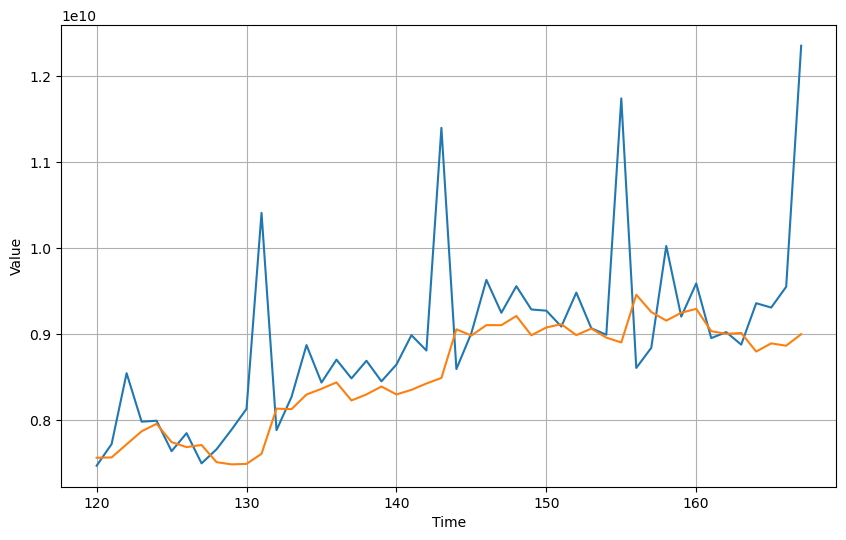

In [62]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

forecast = model_forecast(model, series[..., np.newaxis], window_size)
results = forecast[split_time - window_size:-1, -1, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [63]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.09526430721249646


In [66]:
from tensorflow.keras.layers import Conv1D

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Conv1D(filters=256, kernel_size=9, strides=3, padding='causal', activation='relu', input_shape=[None, 1]))
model.add(Dense(26, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=2)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 - 1s - loss: 74.8328 - 619ms/epoch - 155ms/step
Epoch 2/500
4/4 - 0s - loss: 30.6448 - 41ms/epoch - 10ms/step
Epoch 3/500
4/4 - 0s - loss: 25.0716 - 31ms/epoch - 8ms/step
Epoch 4/500
4/4 - 0s - loss: 23.3625 - 35ms/epoch - 9ms/step
Epoch 5/500
4/4 - 0s - loss: 21.8236 - 31ms/epoch - 8ms/step
Epoch 6/500
4/4 - 0s - loss: 21.3062 - 59ms/epoch - 15ms/step
Epoch 7/500
4/4 - 0s - loss: 19.5164 - 53ms/epoch - 13ms/step
Epoch 8/500
4/4 - 0s - loss: 18.5858 - 32ms/epoch - 8ms/step
Epoch 9/500
4/4 - 0s - loss: 17.8362 - 38ms/epoch - 9ms/step
Epoch 10/500
4/4 - 0s - loss: 17.0882 - 32ms/epoch - 8ms/step
Epoch 11/500
4/4 - 0s - loss: 16.4894 - 36ms/epoch - 9ms/step
Epoch 12/500
4/4 - 0s - loss: 16.0582 - 34ms/epoch - 9ms/step
Epoch 13/500
4/4 - 0s - loss: 17.0202 - 38ms/epoch - 10ms/step
Epoch 14/500
4/4 - 0s - loss: 15.4816 - 29ms/epoch - 7ms/step
Epoch 15/500
4/4 - 0s - loss: 15.7914 - 36ms/epoch - 9ms/step
Epoch 16/500
4/4 - 0s - loss: 15.5885 - 32ms/epoch - 8ms/step
Epoch 17/500
4/4 - 0s 

Epoch 134/500
4/4 - 0s - loss: 11.3960 - 26ms/epoch - 7ms/step
Epoch 135/500
4/4 - 0s - loss: 8.2068 - 24ms/epoch - 6ms/step
Epoch 136/500
4/4 - 0s - loss: 8.3493 - 24ms/epoch - 6ms/step
Epoch 137/500
4/4 - 0s - loss: 8.8699 - 26ms/epoch - 6ms/step
Epoch 138/500
4/4 - 0s - loss: 8.2869 - 24ms/epoch - 6ms/step
Epoch 139/500
4/4 - 0s - loss: 9.3799 - 24ms/epoch - 6ms/step
Epoch 140/500
4/4 - 0s - loss: 9.3951 - 25ms/epoch - 6ms/step
Epoch 141/500
4/4 - 0s - loss: 8.2197 - 26ms/epoch - 7ms/step
Epoch 142/500
4/4 - 0s - loss: 8.3654 - 27ms/epoch - 7ms/step
Epoch 143/500
4/4 - 0s - loss: 8.8692 - 25ms/epoch - 6ms/step
Epoch 144/500
4/4 - 0s - loss: 8.3892 - 23ms/epoch - 6ms/step
Epoch 145/500
4/4 - 0s - loss: 8.7353 - 26ms/epoch - 6ms/step
Epoch 146/500
4/4 - 0s - loss: 8.6582 - 27ms/epoch - 7ms/step
Epoch 147/500
4/4 - 0s - loss: 8.9366 - 26ms/epoch - 6ms/step
Epoch 148/500
4/4 - 0s - loss: 8.4240 - 29ms/epoch - 7ms/step
Epoch 149/500
4/4 - 0s - loss: 8.8654 - 33ms/epoch - 8ms/step
Epoch 1

Epoch 266/500
4/4 - 0s - loss: 8.3862 - 29ms/epoch - 7ms/step
Epoch 267/500
4/4 - 0s - loss: 7.8407 - 30ms/epoch - 7ms/step
Epoch 268/500
4/4 - 0s - loss: 7.8231 - 28ms/epoch - 7ms/step
Epoch 269/500
4/4 - 0s - loss: 9.2920 - 29ms/epoch - 7ms/step
Epoch 270/500
4/4 - 0s - loss: 8.3328 - 28ms/epoch - 7ms/step
Epoch 271/500
4/4 - 0s - loss: 7.8484 - 30ms/epoch - 8ms/step
Epoch 272/500
4/4 - 0s - loss: 7.9163 - 25ms/epoch - 6ms/step
Epoch 273/500
4/4 - 0s - loss: 8.3715 - 31ms/epoch - 8ms/step
Epoch 274/500
4/4 - 0s - loss: 8.0966 - 27ms/epoch - 7ms/step
Epoch 275/500
4/4 - 0s - loss: 7.9710 - 30ms/epoch - 8ms/step
Epoch 276/500
4/4 - 0s - loss: 8.0458 - 28ms/epoch - 7ms/step
Epoch 277/500
4/4 - 0s - loss: 8.2652 - 26ms/epoch - 6ms/step
Epoch 278/500
4/4 - 0s - loss: 7.7542 - 23ms/epoch - 6ms/step
Epoch 279/500
4/4 - 0s - loss: 9.5881 - 31ms/epoch - 8ms/step
Epoch 280/500
4/4 - 0s - loss: 7.7684 - 34ms/epoch - 8ms/step
Epoch 281/500
4/4 - 0s - loss: 8.1799 - 73ms/epoch - 18ms/step
Epoch 2

4/4 - 0s - loss: 7.6029 - 25ms/epoch - 6ms/step
Epoch 399/500
4/4 - 0s - loss: 8.9388 - 29ms/epoch - 7ms/step
Epoch 400/500
4/4 - 0s - loss: 7.6741 - 31ms/epoch - 8ms/step
Epoch 401/500
4/4 - 0s - loss: 8.1145 - 30ms/epoch - 7ms/step
Epoch 402/500
4/4 - 0s - loss: 7.8673 - 29ms/epoch - 7ms/step
Epoch 403/500
4/4 - 0s - loss: 8.0724 - 28ms/epoch - 7ms/step
Epoch 404/500
4/4 - 0s - loss: 7.6154 - 25ms/epoch - 6ms/step
Epoch 405/500
4/4 - 0s - loss: 7.7731 - 27ms/epoch - 7ms/step
Epoch 406/500
4/4 - 0s - loss: 7.4670 - 31ms/epoch - 8ms/step
Epoch 407/500
4/4 - 0s - loss: 7.5846 - 30ms/epoch - 7ms/step
Epoch 408/500
4/4 - 0s - loss: 7.9457 - 29ms/epoch - 7ms/step
Epoch 409/500
4/4 - 0s - loss: 7.8248 - 28ms/epoch - 7ms/step
Epoch 410/500
4/4 - 0s - loss: 8.6624 - 27ms/epoch - 7ms/step
Epoch 411/500
4/4 - 0s - loss: 7.7796 - 29ms/epoch - 7ms/step
Epoch 412/500
4/4 - 0s - loss: 8.0662 - 26ms/epoch - 7ms/step
Epoch 413/500
4/4 - 0s - loss: 8.0521 - 25ms/epoch - 6ms/step
Epoch 414/500
4/4 - 0s

5/5 [==============================] - 0s 10ms/step


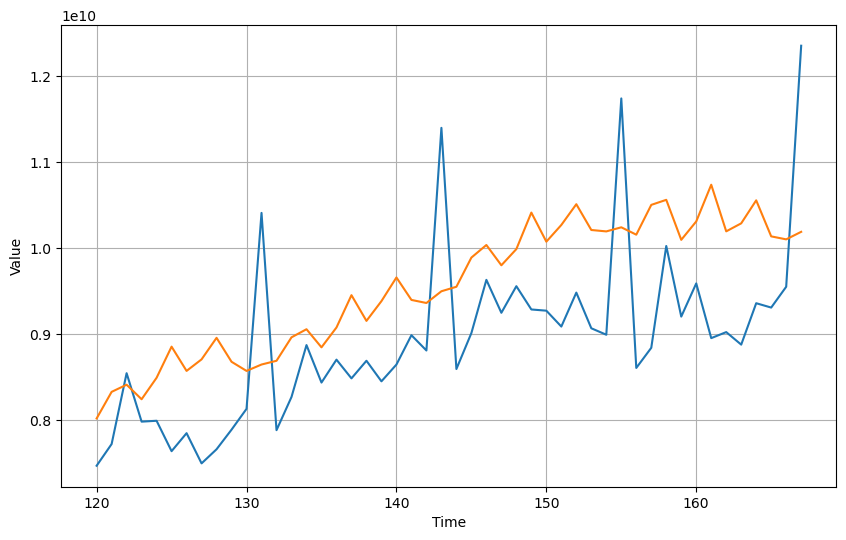

In [67]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

forecast = model_forecast(model, series[..., np.newaxis], window_size)
results = forecast[split_time - window_size:-1, -1, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [70]:
%%time
# ReLU・エポック数500
# my_dir/CNN_4

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

def build_model(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv1D(filters=hp.Int('units',min_value=128, max_value=256, step=64), 
                                   kernel_size=hp.Int('kernels', min_value=3, max_value=9, step=3),
                                   strides=hp.Int('strides', min_value=1, max_value=3, step=1),
                                   padding=hp.Choice('padding', ['causal', 'valid', 'same']),
                                   activation='relu', input_shape=[None, 1]))

  model.add(Dense(units=hp.Int('units1', min_value=2, max_value=30, step=4), activation='relu'))
  model.add(Dense(units=hp.Int('units2', min_value=2, max_value=30, step=4), activation='relu'))
  model.add(Dense(1))

  model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(hp.Choice('momentum', values=[0.5, 0.7, 0.9]), lr=1e-4))
  return model

tuner = RandomSearch(build_model, objective='loss', max_trials=100, executions_per_trial=3, directory='my_dir', project_name='CNN_4')

tuner.search_space_summary()

tuner.search(dataset, epochs=500, verbose=1)

Trial 100 Complete [00h 00m 51s]
loss: 6.784810860951741

Best loss So Far: 6.257528463999431
Total elapsed time: 01h 25m 33s
INFO:tensorflow:Oracle triggered exit
CPU times: user 1h 39min 30s, sys: 14min 13s, total: 1h 53min 44s
Wall time: 1h 25min 33s


In [71]:
tuner.results_summary()

Results summary
Results in my_dir/CNN_4
Showing 10 best trials
Trial summary
Hyperparameters:
units: 256
kernels: 9
strides: 3
padding: valid
units1: 26
units2: 14
momentum: 0.5
Score: 6.257528463999431
Trial summary
Hyperparameters:
units: 192
kernels: 9
strides: 3
padding: valid
units1: 26
units2: 18
momentum: 0.7
Score: 6.278611977895101
Trial summary
Hyperparameters:
units: 128
kernels: 9
strides: 1
padding: valid
units1: 14
units2: 18
momentum: 0.9
Score: 6.339354356129964
Trial summary
Hyperparameters:
units: 192
kernels: 9
strides: 1
padding: valid
units1: 26
units2: 26
momentum: 0.9
Score: 6.359900792439778
Trial summary
Hyperparameters:
units: 192
kernels: 9
strides: 1
padding: valid
units1: 6
units2: 10
momentum: 0.7
Score: 6.366330464680989
Trial summary
Hyperparameters:
units: 256
kernels: 9
strides: 2
padding: valid
units1: 6
units2: 2
momentum: 0.9
Score: 6.383508523305257
Trial summary
Hyperparameters:
units: 128
kernels: 9
strides: 2
padding: valid
units1: 26
units2: 10

In [72]:
from tensorflow.keras.layers import Conv1D

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Conv1D(filters=256, kernel_size=9, strides=3, padding='valid', activation='relu', input_shape=[None, 1]))
model.add(Dense(26, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 7ms/step - loss: 76.6916
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 26.6944
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 7.4333
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 7.7883
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 7.5414
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 6.7455
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 7.5350
Epoch 8/500
4/4 [==============================] - 0s 27ms/step - loss: 9.9266
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 9.4001
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 6.9921
Epoch 11/500
4/4 [==============================] - 0s 5ms/step - loss: 6.6857
Epoch 12/500
4/4 [==============================] - 0s 5ms/step - loss: 8.4325
Epoch 13/500
4/4 [==============================] - 0s 4ms

4/4 [==============================] - 0s 4ms/step - loss: 6.6552
Epoch 105/500
4/4 [==============================] - 0s 4ms/step - loss: 7.1983
Epoch 106/500
4/4 [==============================] - 0s 2ms/step - loss: 7.9693
Epoch 107/500
4/4 [==============================] - 0s 4ms/step - loss: 6.9720
Epoch 108/500
4/4 [==============================] - 0s 4ms/step - loss: 6.6358
Epoch 109/500
4/4 [==============================] - 0s 3ms/step - loss: 6.4549
Epoch 110/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9681
Epoch 111/500
4/4 [==============================] - 0s 2ms/step - loss: 6.7023
Epoch 112/500
4/4 [==============================] - 0s 3ms/step - loss: 7.1482
Epoch 113/500
4/4 [==============================] - 0s 5ms/step - loss: 9.2294
Epoch 114/500
4/4 [==============================] - 0s 3ms/step - loss: 6.6738
Epoch 115/500
4/4 [==============================] - 0s 3ms/step - loss: 7.7737
Epoch 116/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step - loss: 7.0364
Epoch 207/500
4/4 [==============================] - 0s 2ms/step - loss: 6.8095
Epoch 208/500
4/4 [==============================] - 0s 2ms/step - loss: 6.5750
Epoch 209/500
4/4 [==============================] - 0s 2ms/step - loss: 6.3895
Epoch 210/500
4/4 [==============================] - 0s 2ms/step - loss: 6.4028
Epoch 211/500
4/4 [==============================] - 0s 3ms/step - loss: 6.6052
Epoch 212/500
4/4 [==============================] - 0s 2ms/step - loss: 6.6676
Epoch 213/500
4/4 [==============================] - 0s 3ms/step - loss: 7.8333
Epoch 214/500
4/4 [==============================] - 0s 3ms/step - loss: 6.4194
Epoch 215/500
4/4 [==============================] - 0s 2ms/step - loss: 6.5015
Epoch 216/500
4/4 [==============================] - 0s 4ms/step - loss: 6.4533
Epoch 217/500
4/4 [==============================] - 0s 6ms/step - loss: 6.6635
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 6.8449
Epoch 309/500
4/4 [==============================] - 0s 2ms/step - loss: 7.3156
Epoch 310/500
4/4 [==============================] - 0s 2ms/step - loss: 6.3987
Epoch 311/500
4/4 [==============================] - 0s 2ms/step - loss: 7.3305
Epoch 312/500
4/4 [==============================] - 0s 2ms/step - loss: 6.5229
Epoch 313/500
4/4 [==============================] - 0s 2ms/step - loss: 6.8182
Epoch 314/500
4/4 [==============================] - 0s 2ms/step - loss: 6.7448
Epoch 315/500
4/4 [==============================] - 0s 2ms/step - loss: 6.3659
Epoch 316/500
4/4 [==============================] - 0s 2ms/step - loss: 8.4624
Epoch 317/500
4/4 [==============================] - 0s 2ms/step - loss: 6.4095
Epoch 318/500
4/4 [==============================] - 0s 2ms/step - loss: 6.5744
Epoch 319/500
4/4 [==============================] - 0s 2ms/step - loss: 6.4322
Epoch 320/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 7.2309
Epoch 411/500
4/4 [==============================] - 0s 2ms/step - loss: 7.5814
Epoch 412/500
4/4 [==============================] - 0s 2ms/step - loss: 6.3994
Epoch 413/500
4/4 [==============================] - 0s 2ms/step - loss: 7.2529
Epoch 414/500
4/4 [==============================] - 0s 2ms/step - loss: 6.6793
Epoch 415/500
4/4 [==============================] - 0s 2ms/step - loss: 6.6007
Epoch 416/500
4/4 [==============================] - 0s 2ms/step - loss: 7.3991
Epoch 417/500
4/4 [==============================] - 0s 2ms/step - loss: 6.7202
Epoch 418/500
4/4 [==============================] - 0s 2ms/step - loss: 6.3563
Epoch 419/500
4/4 [==============================] - 0s 2ms/step - loss: 6.8324
Epoch 420/500
4/4 [==============================] - 0s 2ms/step - loss: 6.3683
Epoch 421/500
4/4 [==============================] - 0s 2ms/step - loss: 7.2483
Epoch 422/500
4/4 [==============================] - 0

5/5 [==============================] - 0s 8ms/step


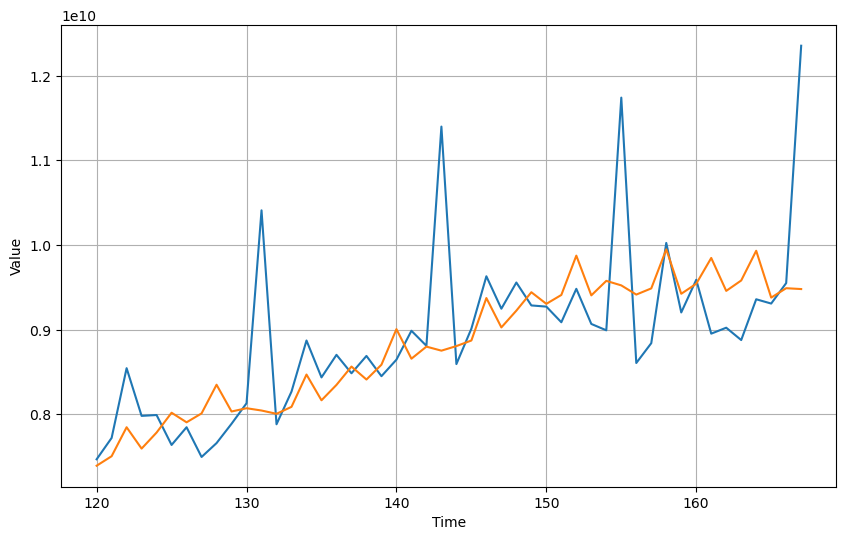

In [73]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

forecast = model_forecast(model, series[..., np.newaxis], window_size)
results = forecast[split_time - window_size:-1, -1, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [75]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, results))

MAPE:
0.05082915854203527
